# Heart Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("c:\\Users\\ADMIN\\AppData\\Local\\Temp\\Rar$DRa10720.32440\\heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
print(data.size)
print(data.shape)
data.info()

3887
(299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# If you want to rename the column 'DEATH_EVENT' to 'heartFailure':
#data = data.rename(columns={'DEATH_EVENT': 'heartFailure'})

# Or alternatively:
data = data.rename({'DEATH_EVENT': 'heartFailure'}, axis=1)

data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,heartFailure
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
heartFailure                0
dtype: int64

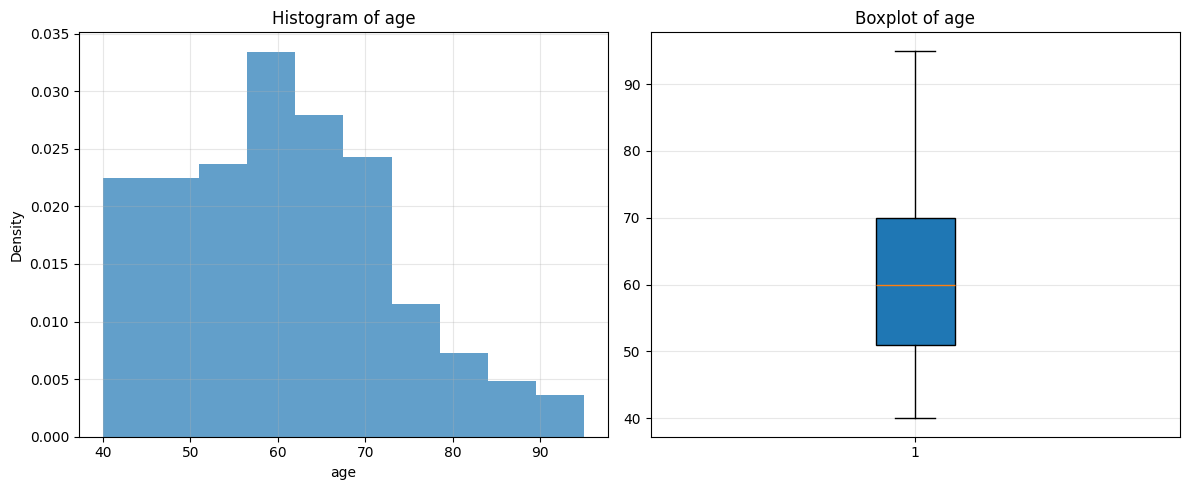

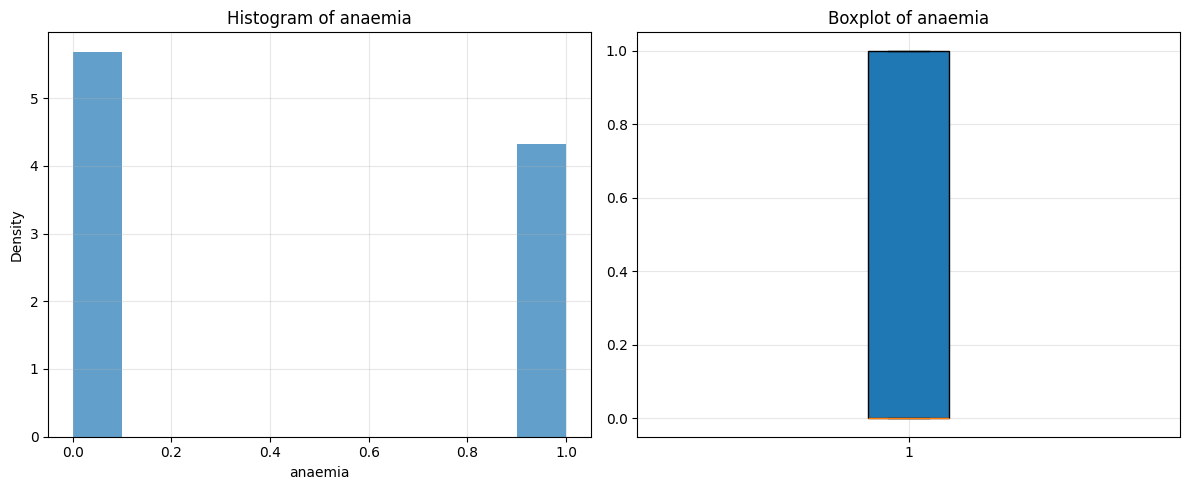

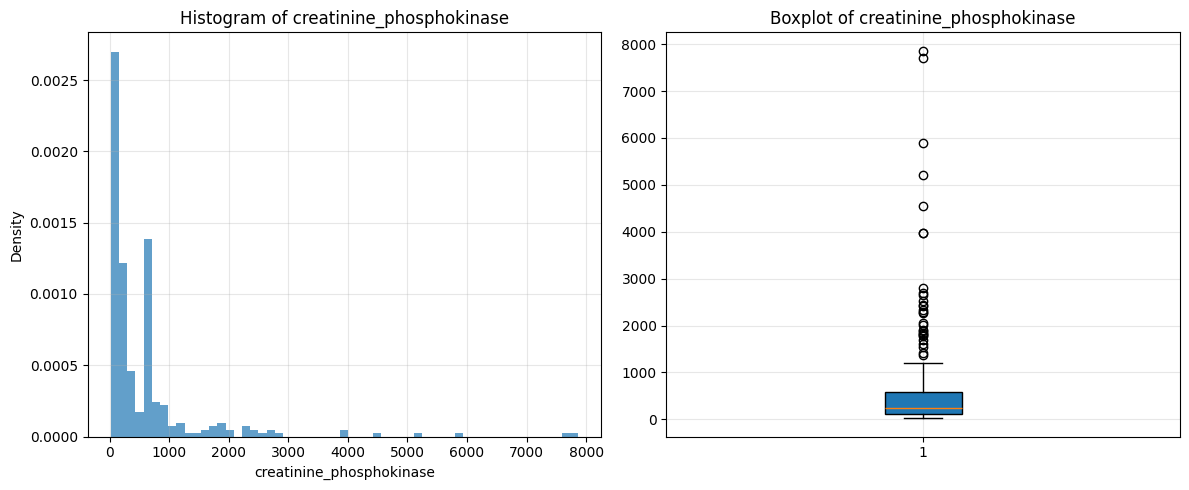

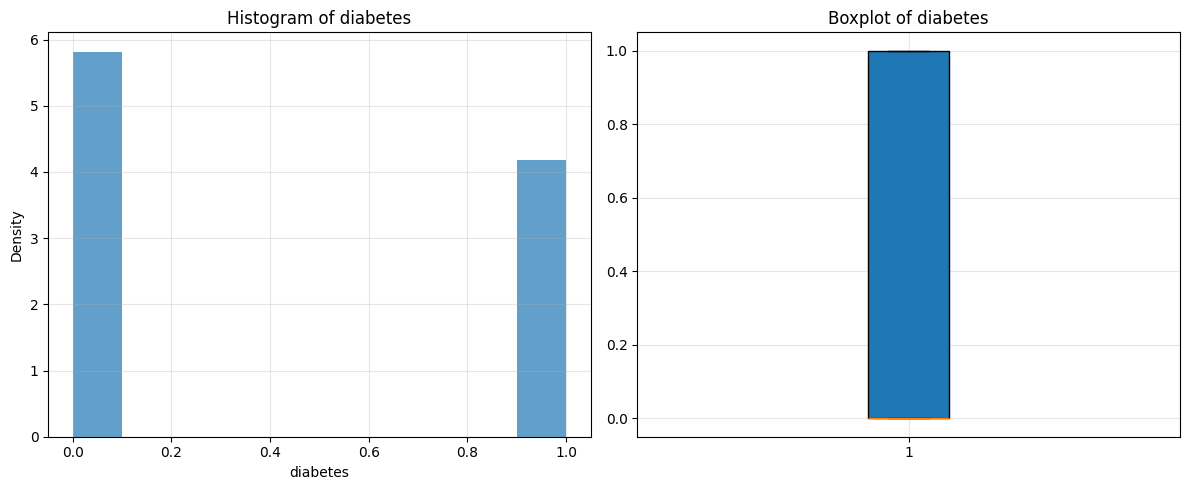

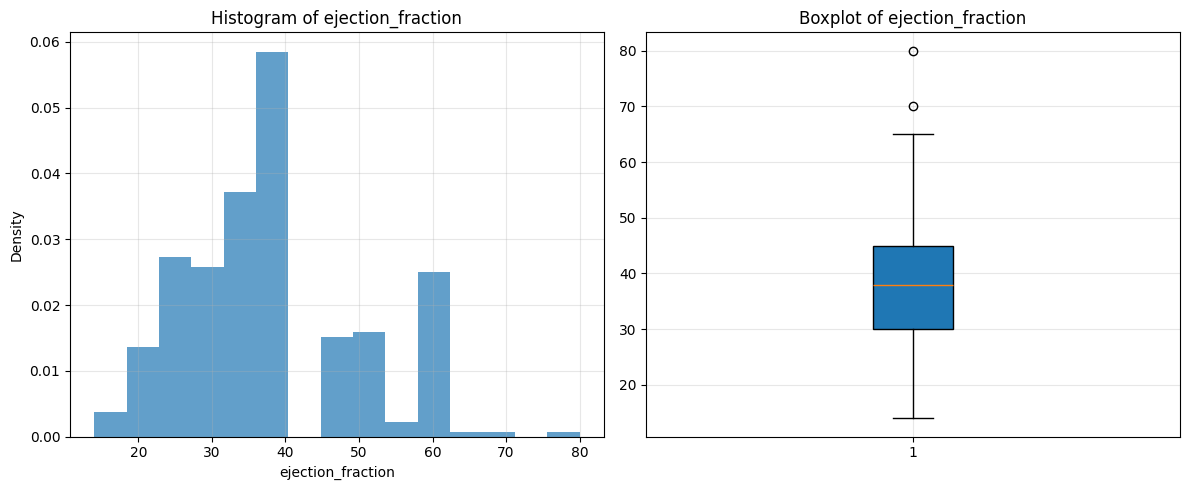

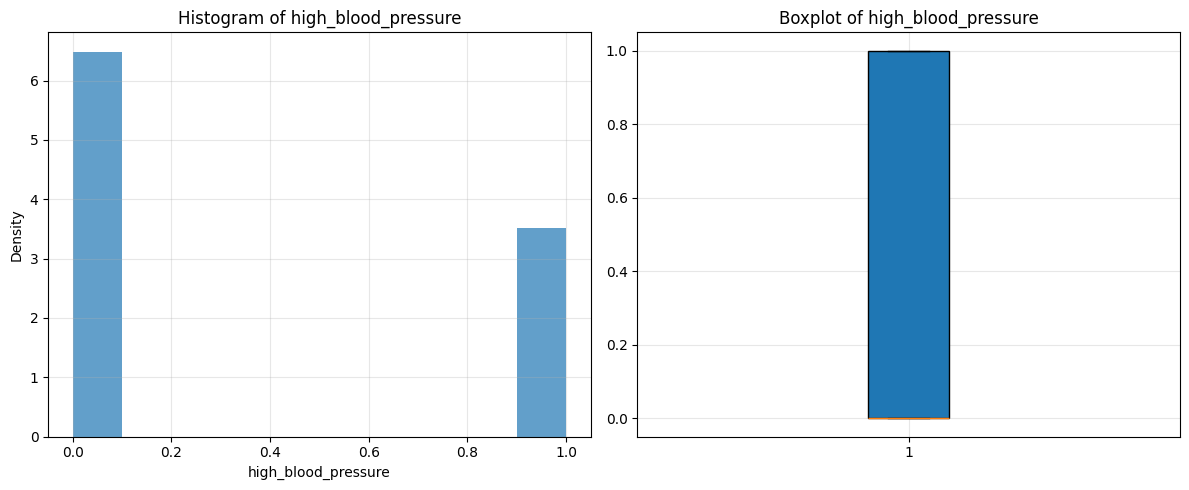

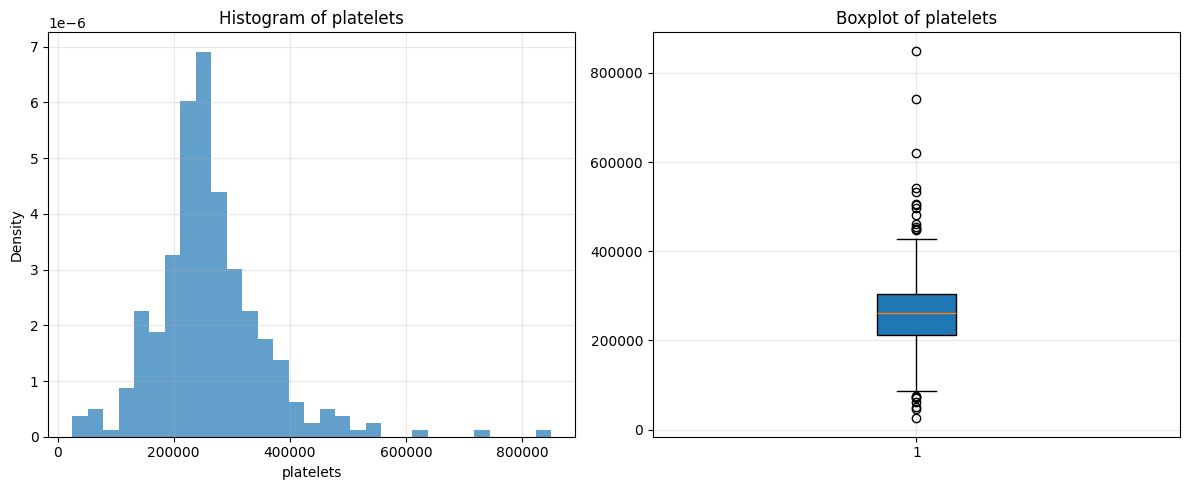

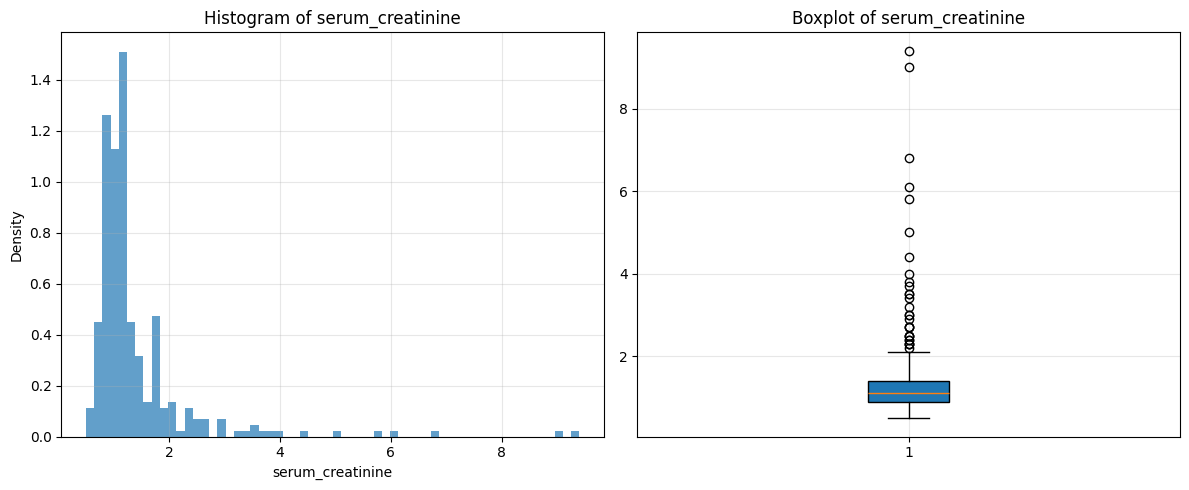

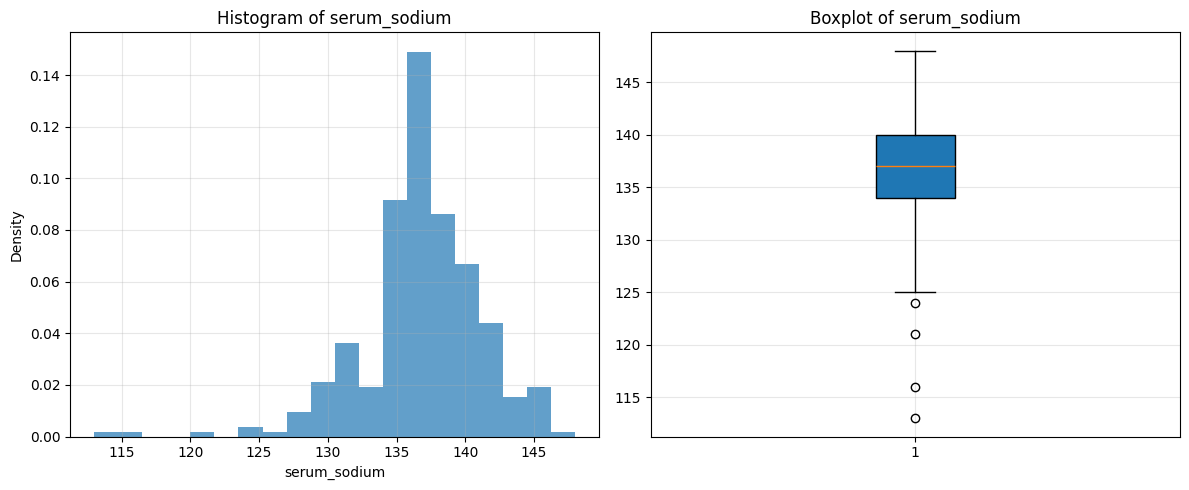

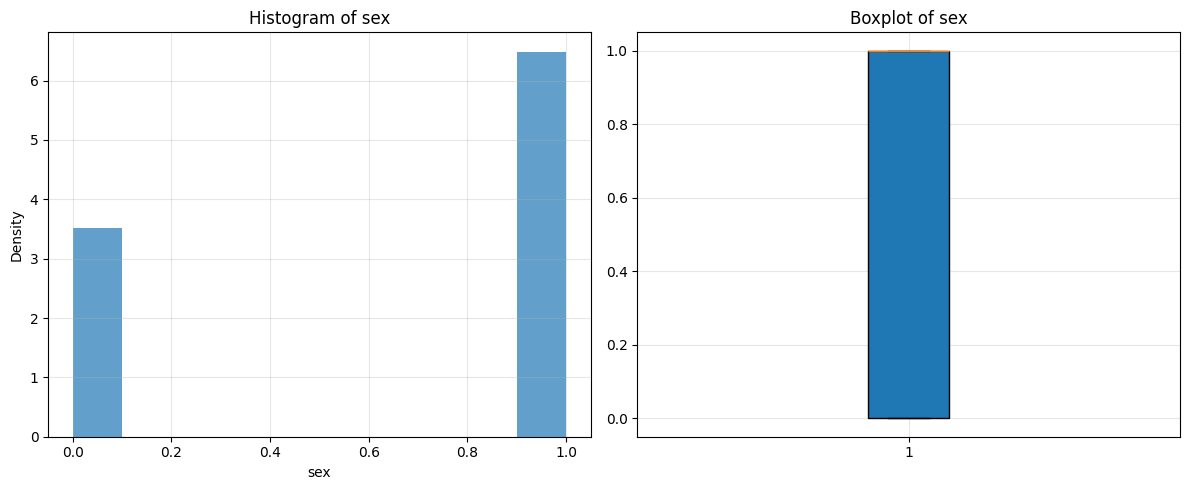

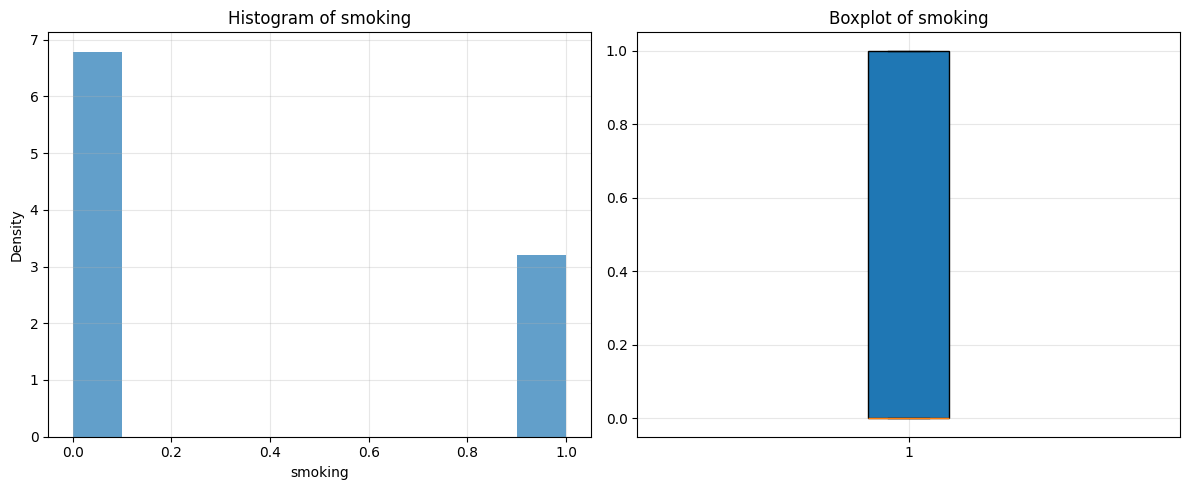

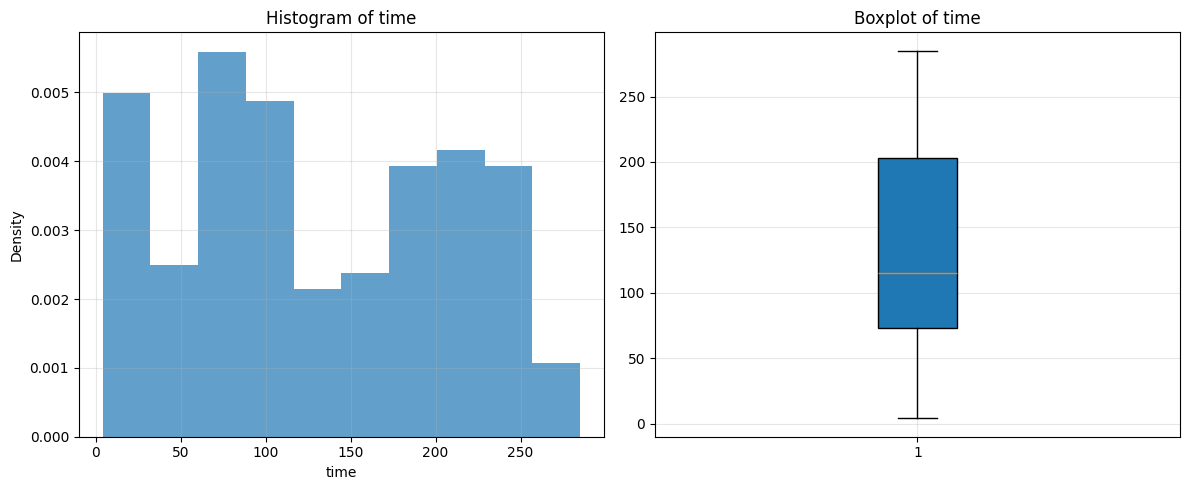

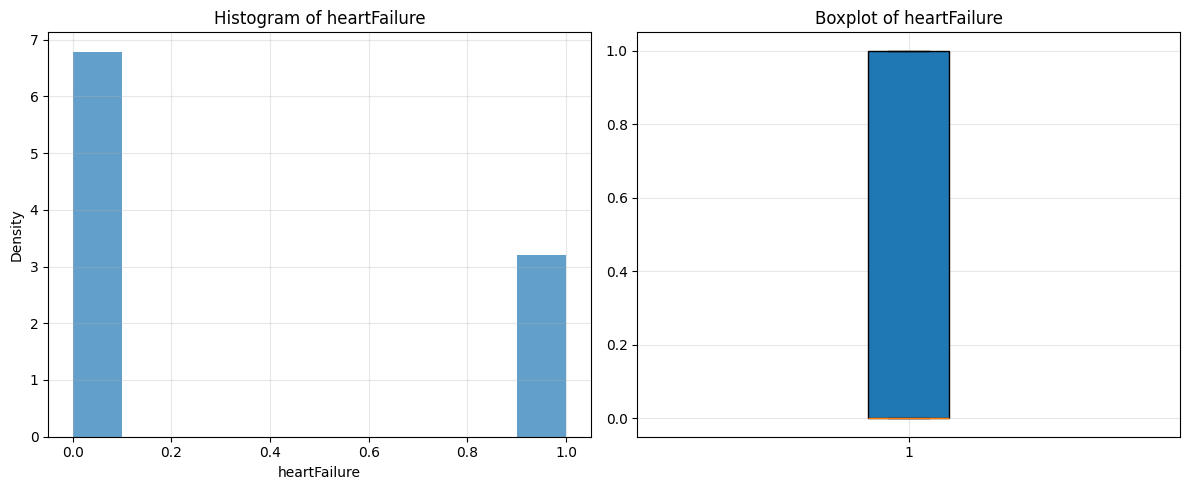

In [6]:
def column_distributions(df: pd.DataFrame) -> None:
    """
    Creates visualization plots showing distribution of each column in the dataframe.
    
    For each column, creates a figure with two subplots:
    - A histogram with density plot on the left
    - A boxplot on the right
    
    Parameters:
    -----------
    df : pd.DataFrame
        The input DataFrame containing the data to be visualized.
        Only numeric columns will be processed.
        
    Returns:
    --------
    None
        Displays the plots for each column
    """
    # Check if input is a DataFrame
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Input must be a pandas DataFrame")
    
    # Convert numeric-like objects to numeric type
    # df = df.apply(pd.to_numeric, errors='ignore')
    
    # Filter only numeric columns
    # numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # if len(numeric_columns) == 0:
    #     print("No numeric columns found in the DataFrame")
    #     return
        
    for column in df.columns:
        try:
            # Get the data and remove any NaN values
            # data = df[column].dropna().values
                      
            # Create figure and axes
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
            
            # Plot histogram
            ax1.hist(data[column], bins='auto', density=True, alpha=0.7)
            ax1.set_title(f'Histogram of {column}')
            ax1.set_xlabel(column)
            ax1.set_ylabel('Density')
            ax1.grid(True, alpha=0.3)
            
            # Plot boxplot
            ax2.boxplot(data[column], patch_artist=True)
            ax2.set_title(f'Boxplot of {column}')
            ax2.grid(True, alpha=0.3)
            
            # Adjust layout
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error processing column {column}: {str(e)}")
            plt.close('all')

column_distributions(data)


In [7]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,heartFailure
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [8]:
from sklearn.preprocessing import StandardScaler
x=data[data.columns[:-1]]
y=data['heartFailure'].values
ss=StandardScaler()
x=ss.fit_transform(x)
x #returns an array

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [9]:
import pandas as pd
y
data=np.hstack((x,(np.reshape(y,(-1,1)))))
data=pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1.0
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1.0
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1.0
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1.0
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451,0.0
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357,0.0
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697,0.0
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509,0.0


In [10]:
data.columns=['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time','heartFailure']

In [11]:
data['heartFailure'].value_counts()

heartFailure
0.0    203
1.0     96
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(209, 12) (209,)
(90, 12) (90,)


heartFailure
1.0    142
0.0    142
Name: count, dtype: int64


<Axes: xlabel='heartFailure'>

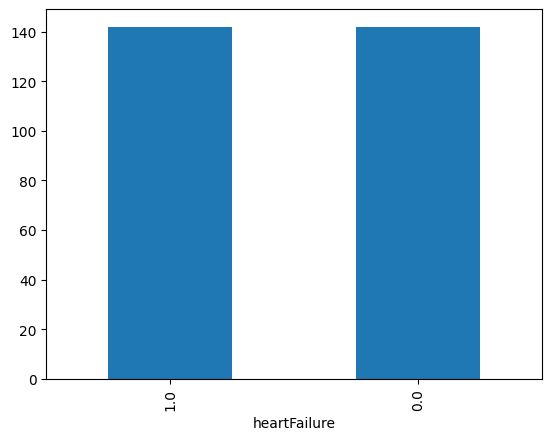

In [13]:
column_names=['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time','heartFailure']
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_train,y_train=smote.fit_resample(x_train,y_train)
train=np.hstack((x_train,y_train.reshape(-1,1)))
train=pd.DataFrame(train,columns=column_names)

print(train['heartFailure'].value_counts())
train['heartFailure'].value_counts().plot(kind='bar')

# Modelling

In [16]:
from sklearn.naive_bayes import GaussianNB
x_train=train[train.columns[:-1]].values
y_train=train[train.columns[-1]].values
nb=GaussianNB()
nb.fit(x_train,y_train)
nb.predict(x_test)
print("Accuracy on training data",nb.score(x_train, y_train ))
print("Accuracy on test data",nb.score(x_test,y_test))


Accuracy on training data 0.7922535211267606
Accuracy on test data 0.8


In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.predict(x_test)
print("Accuracy on training data",lr.score(x_train, y_train ))
print("Accuracy on test data",lr.score(x_test,y_test))


Accuracy on training data 0.8098591549295775
Accuracy on test data 0.8


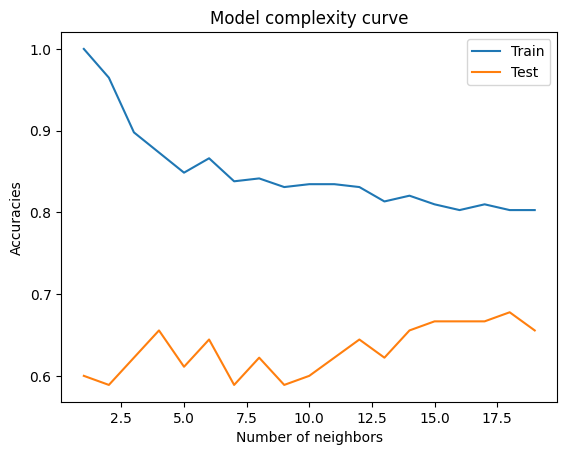

In [20]:
from sklearn.neighbors import KNeighborsClassifier
accuracies_training={}
accuracies_testing={}
for i in np.arange(1,20,1):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    scoretrain=knn.score(x_train,y_train)
    accuracies_training[i]=scoretrain
    scoretest=knn.score(x_test,y_test)
    accuracies_testing[i]=scoretest
#plt.figure(figsize=(3,3))    
plt.plot(np.arange(1,20,1),accuracies_training.values(),label="Train")    
plt.plot(np.arange(1,20,1),accuracies_testing.values(),label="Test")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracies")
plt.title("Model complexity curve")
plt.legend()
plt.show()


In [22]:
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train,y_train)
knn.predict(x_test)
print("Accuracy on training data",knn.score(x_train, y_train ))
print("Accuracy on test data",knn.score(x_test,y_test))

Accuracy on training data 0.8028169014084507
Accuracy on test data 0.6777777777777778


In [23]:
#Using SVM
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=0)
svc.fit(x_train,y_train)
svc.predict(x_test)
print("Accuracy on training data",svc.score(x_train, y_train ))
print("Accuracy on test data",svc.score(x_test,y_test))

Accuracy on training data 0.8380281690140845
Accuracy on test data 0.8


In [24]:
#Using Neural nets
import tensorflow as tf 
#.Sequntial groups a linear stack of layers into a tf.Keras.Model
model= tf.keras.Sequential ([
    tf.keras.layers.Dense(16,activation='relu'),#a 16 nueron dense layer is a layer that is deeply connected with its preceeding layer and the activation functon specified as relu(rectified linear unit,which is based on the priciple that if a value(x-input) is less than zero the y(output) is zero and if greater than zero then it's still that number x==y) 
    #every single neuron receives input from another neurons output from before
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")#here's where binary classification falls in remember our dataset has 2 classes in the label column 0 and 1

])


In [25]:
#model compilation

import tensorflow as tf
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy,
    metrics=['accuracy']
)

In [26]:
#Check performance on training data

model.evaluate(x_train,y_train)

# The reason for such poor performance is because our model has not being trained i.e it has not yet seen ay training data

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4486 - loss: 0.7497


[0.7509027123451233, 0.43661972880363464]

In [27]:
model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.4637 - loss: 0.7381 - val_accuracy: 0.5333 - val_loss: 0.7031
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4859 - loss: 0.7413 - val_accuracy: 0.5556 - val_loss: 0.6946
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6146 - loss: 0.6673 - val_accuracy: 0.5667 - val_loss: 0.6856
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6460 - loss: 0.6592 - val_accuracy: 0.6222 - val_loss: 0.6770
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6731 - loss: 0.6500 - val_accuracy: 0.6111 - val_loss: 0.6664
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6637 - loss: 0.6214 - val_accuracy: 0.6444 - val_loss: 0.6585
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6962 - loss: 0.6118 - val_accuracy: 0.6333 - val_loss: 0.6477
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6850 - loss: 0.6087 - val_accuracy: 0.6333 - val_loss: 0.6387
Epoch 9/20


In [28]:
results=model.evaluate(x_test,y_test)
print(results)
print(results[0])
print(results[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6954 - loss: 0.5610 
[0.5396352410316467, 0.7111111283302307]
0.5396352410316467
0.7111111283302307
